# Uvod do prace s datami pomocou kniznic Numpy a Pandas
* Intro do pouzivania kniznic Pandas, Matplotlib a Numpy
* Ako pouzit tieto kniznice na zakladne upravovanie formy dat (data cleaning, reshaping, wrangling)
* Velmi lahke zaklady explorativnej analyzy a prace s chybajucimi hodnotami

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Na co nam je Pandas?
* importovanie dat zo standardnych formatov
* vycistit
* pozriet sa do dat (statistiky, sampling, zakladne grafy)
* posunut data na analyzu / trenovanie modelov

### Co je Pandas?
* Python komunita sa inspirovala a ukradla to dobre z `data.frame` struktury v R alebo obdobnych struktur v Matlabe alebo Octave
* Umoznuje zakladne operacie s datami, sampling, group by, merge, ...
* Ako zaklad je pouzite NumPy pole

### Zakladne ulohy
* Spracovanie chybajucich udajov (.dropna(), pd.isnull())
* Merge, join (concat, join)
* Group
* Zmena tvaru dat (pivotovanie) (stack, pivot)
* Praca s casovymi radmi (resampling, timezones, ..)
* Kreslenie

## Nieco k Numpy

In [10]:
pole = [1,2,3]
pole * 3
print([1, 2, 4] * 3)


[1, 2, 4, 1, 2, 4, 1, 2, 4]


In [12]:
np_pole = np.array([1,2,3])
np_pole * 3

np.array([1, 2, 3, 4]) * 3 

array([ 3,  6,  9, 12])

In [13]:
x = np.arange(20).reshape(4, 5) # skusit viacere dimenzie
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [14]:
x.shape

(4, 5)

In [15]:
x.ndim

2

In [6]:
# spocitanie sumy po jednotlivych dimenziach
# funguju aj ine agregacne funkcie
# netreba definovat os
x.sum(axis=0)

array([30, 34, 38, 42, 46])

## Viacero typov cisel

In [7]:
x.dtype

dtype('int32')

In [8]:
a = np.array([.1,.2])
print(a)
a.dtype

[0.1 0.2]


dtype('float64')

In [9]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
print(c)
c.dtype

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


dtype('complex128')

# Rozne sposoby ako vyrobit pole

In [ ]:
np.array([1,2,3])

In [ ]:
np.zeros((3,4))

In [ ]:
np.ones((2,5))

In [10]:
np.repeat(3, 10).reshape([2,5])

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [11]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [12]:
x = np.linspace( 0, 2*np.pi, 100 )
f = np.sin(x)
f

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

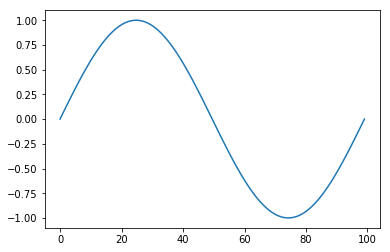

In [13]:
plt.plot(f)

## Maticove operacie

In [15]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )

In [16]:
A

array([[1, 1],
       [0, 1]])

In [17]:
B

array([[2, 0],
       [3, 4]])

In [18]:
np.transpose(B)

array([[2, 3],
       [0, 4]])

In [19]:
A*B

array([[2, 0],
       [0, 4]])

In [ ]:
# skutocne nasobenie matic
A.dot(B) # np.dot(A, B)

## Vyberanie prvkov

In [20]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [21]:
a[2]

8

In [22]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [23]:
a[2:6:2]

array([ 8, 64], dtype=int32)

In [24]:
# vyber prvkov sa da pouzit aj na upravu pola
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,
         729], dtype=int32)

In [25]:
a[ : :-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000], dtype=int32)

## Vyberanie prvkov z viacrozmerneho pola

In [26]:
b = np.arange(20).reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [27]:
# rozmery su oddelene ciarkou
b[2,3]

13

In [28]:
b[2,]

array([10, 11, 12, 13, 14])

In [29]:
b[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

In [30]:
b[:,2:4]

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18]])

Dalsie operacie si pozrite 
* tu https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* a tu https://docs.scipy.org/doc/numpy-dev/reference/index.html

## Nejake ukazky k Pandas

Pandas pouziva Numpy pole a nad nim si postavili typ `Series` a `DataFrame`

In [22]:
s = pd.Series([0,1,2,3,4])
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [27]:
# k numpy polu je pridany explicitny index 
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [28]:
print(s.values)

[0 1 2 3 4]


In [23]:
s[0]

0

In [19]:
# na rozdiel od numpy vsak index moze byt aj nieco ine ako cislo
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [29]:
s2['c']

2

In [30]:
s2[2]

2

In [31]:
s2.c

2

In [49]:
# na vytvorenie Series objektu sa da pouzit aj asociatyvne pole
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

In [33]:
population['France']

64.3

In [34]:
# kedze je to postavene na Numpy, tak vieme robit vsetky zaujimave operacie
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

In [35]:
# index ma implicitne dane poradie, takze sa da robit rozsah
population['Belgium':'Netherlands']

Belgium        11.3
France         64.3
Germany        81.3
Netherlands    16.9
dtype: float64

In [36]:
population.mean()

47.739999999999995

Da sa pristupovat k prvkom tak, ako sme na to zvyknuti z R

In [37]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [38]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

No a `DataFrame` je vlastne multidimenzionalny `Series`

In [3]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

area    capital         country  population
0   30510   Brussels         Belgium        11.3
1  671308      Paris          France        64.3
2  357050     Berlin         Germany        81.3
3   41526  Amsterdam     Netherlands        16.9
4  244820     London  United Kingdom        64.9

In [40]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [41]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

In [42]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

In [43]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

In [44]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [45]:
countries.describe()

area  population
count       5.000000    5.000000
mean   269042.800000   47.740000
std    264012.827994   31.519645
min     30510.000000   11.300000
25%     41526.000000   16.900000
50%    244820.000000   64.300000
75%    357050.000000   64.900000
max    671308.000000   81.300000

In [46]:
countries.describe(include='all')

area capital  country  population
count        5.000000       5        5    5.000000
unique            NaN       5        5         NaN
top               NaN  London  Germany         NaN
freq              NaN       1        1         NaN
mean    269042.800000     NaN      NaN   47.740000
std     264012.827994     NaN      NaN   31.519645
min      30510.000000     NaN      NaN   11.300000
25%      41526.000000     NaN      NaN   16.900000
50%     244820.000000     NaN      NaN   64.300000
75%     357050.000000     NaN      NaN   64.900000
max     671308.000000     NaN      NaN   81.300000

In [63]:
countries = countries.set_index('country')
countries

area    capital  population     density     area_miles
country                                                                 
Belgium          30510   Brussels        11.3  370.370370   11779.968262
France          671308      Paris        64.3   95.783158  259193.278739
Germany         357050     Berlin        81.3  227.699202  137857.675126
Netherlands      41526  Amsterdam        16.9  406.973944   16033.266538
United Kingdom  244820     London        64.9  265.092721   94525.461488

a vieme teraz velmi jednoducho pristupovat k jednotlivym stlpcom

In [64]:
countries.area # countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [65]:
countries['population']*1000000 / countries['area'] # hustota zaludnenia

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

In [6]:
# vieme si jednoducho vyrobit novy stlpec
countries['density'] = countries['population']*1000000 / countries['area']
countries

area    capital         country  population     density
0   30510   Brussels         Belgium        11.3  370.370370
1  671308      Paris          France        64.3   95.783158
2  357050     Berlin         Germany        81.3  227.699202
3   41526  Amsterdam     Netherlands        16.9  406.973944
4  244820     London  United Kingdom        64.9  265.092721

In [7]:
# existuje ale aj iny sposob ako spracovat vsetky riadky
countries['area_miles'] = countries.area.apply(lambda x: x / 2.58999)
countries['area_miles']

0     11779.968262
1    259193.278739
2    137857.675126
3     16033.266538
4     94525.461488
Name: area_miles, dtype: float64

In [8]:
# ak by ste chceli mat moznost pracovat s viacerimi atributmi naraz
countries.apply(lambda x: x.area / 2.58999, axis=1)
# dalo by sa iterovat aj cez stlpce ak axis=0. Dalo by sa to pouzit napriklad na nejake pocitanie statistik po stlpcoch

0     11779.968262
1    259193.278739
2    137857.675126
3     16033.266538
4     94525.461488
dtype: float64

In [9]:
# a na zaklade neho napriklad vyberat riadky
countries[countries['density'] > 300]

area    capital      country  population     density    area_miles
0  30510   Brussels      Belgium        11.3  370.370370  11779.968262
3  41526  Amsterdam  Netherlands        16.9  406.973944  16033.266538

In [10]:
# vieme potom napriklad usporiadavat
countries.sort_values(by='density', ascending=False)

area    capital         country  population     density     area_miles
3   41526  Amsterdam     Netherlands        16.9  406.973944   16033.266538
0   30510   Brussels         Belgium        11.3  370.370370   11779.968262
4  244820     London  United Kingdom        64.9  265.092721   94525.461488
2  357050     Berlin         Germany        81.3  227.699202  137857.675126
1  671308      Paris          France        64.3   95.783158  259193.278739

     area    capital         country  population     density     area_miles
0   30510   Brussels         Belgium        11.3  370.370370   11779.968262
1  671308      Paris          France        64.3   95.783158  259193.278739
2  357050     Berlin         Germany        81.3  227.699202  137857.675126
3   41526  Amsterdam     Netherlands        16.9  406.973944   16033.266538
4  244820     London  United Kingdom        64.9  265.092721   94525.461488


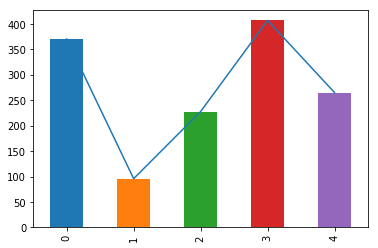

In [19]:
print(countries)
# velmi silna vlastnost je priamociare vykreslovanie
countries.density.plot()
countries.density.plot(kind='bar')
countries.plot()

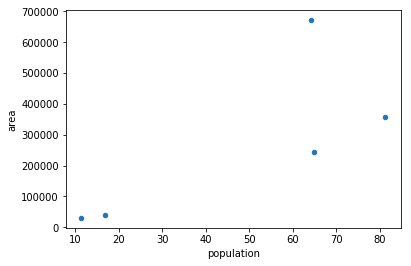

In [20]:
countries.plot(kind='scatter', x='population', y='area')

Kedze nam v `DataFrame` pribudla moznost vyberat stlpce podla nazvu, tak sa nam trochu skomplikovalo vyberanie prvkov oproti Numpy. Musime rozoznavat 
* vyberanie podla nazvu a 
* podla pozicie.


In [24]:
countries['area']

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

In [25]:
countries[['area', 'density']]

area     density
0   30510  370.370370
1  671308   95.783158
2  357050  227.699202
3   41526  406.973944
4  244820  265.092721

In [33]:
# ked ale chceme rozsah, tak nam to pristupuje k riadkom
countries['France':'Netherlands']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [France] of <class 'str'>

Na pokrocilejsie vyberanie z tabulky pouzivame:
* `loc` a
* `iloc`

In [38]:
# pristup ku konkretnej bunke pomocou riadka a stlpca
countries.loc['Germany', 'area']

KeyError: 'the label [Germany] is not in the [index]'

In [40]:
# tu sa daju pouzit aj rozsahy na oboch rozmeroch
print(countries)
countries.loc[1:2, :]

     area    capital         country  population     density     area_miles
0   30510   Brussels         Belgium        11.3  370.370370   11779.968262
1  671308      Paris          France        64.3   95.783158  259193.278739
2  357050     Berlin         Germany        81.3  227.699202  137857.675126
3   41526  Amsterdam     Netherlands        16.9  406.973944   16033.266538
4  244820     London  United Kingdom        64.9  265.092721   94525.461488


area capital  country  population     density     area_miles
1  671308   Paris   France        64.3   95.783158  259193.278739
2  357050  Berlin  Germany        81.3  227.699202  137857.675126

In [44]:
# ale aj vymenovanie
countries.loc[countries['density']>300, ['capital', 'population']]

capital  population
0   Brussels        11.3
3  Amsterdam        16.9

In [46]:
# iloc vybera podla poradia. Toto je podobne pristupovaniu k prvkom ako v Numpy
countries.iloc[0:2,1:3]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [97]:
# samozrejem, ze sa stale daju priradovat hodnoty
countries.loc['Belgium':'Germany', 'population'] = 10
countries

area    capital  population     density     area_miles
country                                                                 
Belgium          30510   Brussels        10.0  370.370370   11779.968262
France          671308      Paris        10.0   95.783158  259193.278739
Germany         357050     Berlin        10.0  227.699202  137857.675126
Netherlands      41526  Amsterdam        16.9  406.973944   16033.266538
United Kingdom  244820     London        64.9  265.092721   94525.461488

## Zmena tvaru dat pomocou Pandas

In [50]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

A  B  C
0  one  a  0
1  one  b  1
2  two  a  2
3  two  b  3

`unstack` presuva hodnoty v nejakom stlpci a vytvori z nich nazvy stlpcov

casto sa nam to hodi ak mame data, ktore su v trochu unej forme ako by sme potrebovali

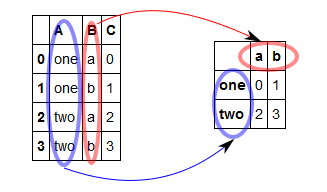

In [51]:
from IPython.display import Image
Image("img/stack.png")

In [52]:
df = df.set_index(['A', 'B']) # najskor si vyberieme stlpec, ktory pouzijeme ako index. 
# Ten druhy bude dodavat hodnoty do nazvov novych stlpcov
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [53]:
# teraz si povieme v ktorom stlpci su hodnoty a nechame to preskupit
result = df['C'].unstack()
result

B    a  b
A        
one  0  1
two  2  3

### Kedy by som mohol potrebovat takuto transformaciu?

prdstavte si, ze mate logy nejakej aplikacie, kde mate id pouzivatela a  nazov akcie, ktoru spravil vzdy, ked ju vykonal. Chcete vediet kolko krat spravil rozne akcie kazdy pouzivatel a to vykreslit do obrazku.

In [54]:
row_count = 20
user_ids = np.random.choice([1,2,3,4], row_count)
actions = np.random.choice(['create', 'update', 'delete', 'retrieve', 'retrieve'], row_count)

df=pd.DataFrame({'user_id': user_ids, 'action': actions})
df
#df.head()

action  user_id
0     update        1
1     delete        4
2     create        4
3     create        4
4     create        3
5     create        2
6     create        1
7   retrieve        4
8   retrieve        3
9     update        3
10  retrieve        4
11  retrieve        2
12    update        1
13    update        3
14    create        1
15    delete        4
16  retrieve        1
17  retrieve        1
18    update        4
19    create        3

In [55]:
pom = df.groupby(['user_id', 'action']).size().reset_index() # operaciu groupby vam vysvetlim este raz kusok neskor
pom 

user_id    action  0
0         1    create  2
1         1  retrieve  2
2         1    update  2
3         2    create  1
4         2  retrieve  1
5         3    create  2
6         3  retrieve  1
7         3    update  2
8         4    create  2
9         4    delete  2
10        4  retrieve  2
11        4    update  1

In [56]:
pom = pom.set_index(['user_id', 'action'])
pom

0
user_id action     
1       create    2
        retrieve  2
        update    2
2       create    1
        retrieve  1
3       create    2
        retrieve  1
        update    2
4       create    2
        delete    2
        retrieve  2
        update    1

In [57]:
pom[0].unstack()
pom[0].unstack(fill_value=0)

action   create  delete  retrieve  update
user_id                                  
1             2       0         2       2
2             1       0         1       0
3             2       0         1       2
4             2       2         2       1

### Opacna operacie je stack

In [61]:
# opacna transformacia je stack. zoberie nazvy stlpcov a spravi z nich hodnoty
print(df)
print()
print(result)
df = result.stack().reset_index(name='C')
df

     A  B  C
0  one  a  0
1  one  b  1
2  two  a  2
3  two  b  3

B    a  b
A        
one  0  1
two  2  3


A  B  C
0  one  a  0
1  one  b  1
2  two  a  2
3  two  b  3

Tato operacia sa pouziva napriklad ak mate viacere pozorovania v jednom riadku a chctee ich rozdelit. Napriklad na riadku mate teplotu pocas roznych hodin dna a vy chcete mat na kazdom riadku len jednu hodnotu teploty a chcte mat namiesto toho 24 riadkov pre kazdy den.

In [137]:
from datetime import datetime, timedelta
row_count = 5
index = [datetime.now().date() - timedelta(days=i) for i in range(row_count, 0, -1)]
data = dict(zip(range(24), np.random.rand(24, row_count) * 5 + 20))
df = pd.DataFrame(index=index, data=data)
df.head()

0          1          2          3          4          5   \
2018-02-23  23.836601  24.188960  20.903031  20.963989  20.484017  24.138068   
2018-02-24  20.613677  21.702710  21.453557  20.027175  22.266152  20.467760   
2018-02-25  24.163414  23.195137  23.431798  22.392158  23.467409  24.280918   
2018-02-26  20.581806  21.553934  24.777692  24.967679  21.321203  24.451511   
2018-02-27  21.434955  22.052553  22.149687  21.436794  22.889539  20.661369   

                   6          7          8          9     ...             14  \
2018-02-23  20.080876  21.874745  24.864220  20.586787    ...      21.900615   
2018-02-24  23.095337  20.387635  20.114627  22.412906    ...      22.591956   
2018-02-25  23.088790  20.751521  20.919518  20.473967    ...      22.861867   
2018-02-26  24.332492  24.171971  23.151901  24.331604    ...      23.845234   
2018-02-27  22.426226  24.345657  21.947125  22.963713    ...      21.206651   

                   15         16         17         18         19         20  \
2018-02-23  21.318516  23.992669  21.011141  21.305649  23.712552  22.543043   
2018-02-24  20.347252  21.666903  21.500283  23.383631  21.714148  22.937945   
2018-02-25  23.251394  20.309069  21.708220  21.238361  20.895137  23.488897   
2018-02-26  22.334498  23.175229  24.704572  24.643230  23.966261  20.029442   
2018-02-27  23.007217  24.274357  21.691916  23.503448  21.256743  22.878291   

                   21         22         23  
2018-02-23  22.316115  24.228910  24.715351  
2018-02-24  23.689767  20.135392  24.153072  
2018-02-25  23.265309  20.850564  20.243915  
2018-02-26  20.048317  24.096386  21.494162  
2018-02-27  22.707433  21.226402  20.872133  

[5 rows x 24 columns]

In [138]:
df.stack().reset_index(name='temperature')

level_0  level_1  temperature
0    2018-02-23        0    23.836601
1    2018-02-23        1    24.188960
2    2018-02-23        2    20.903031
3    2018-02-23        3    20.963989
4    2018-02-23        4    20.484017
5    2018-02-23        5    24.138068
6    2018-02-23        6    20.080876
7    2018-02-23        7    21.874745
8    2018-02-23        8    24.864220
9    2018-02-23        9    20.586787
10   2018-02-23       10    20.281165
11   2018-02-23       11    20.820512
12   2018-02-23       12    22.388014
13   2018-02-23       13    22.394486
14   2018-02-23       14    21.900615
15   2018-02-23       15    21.318516
16   2018-02-23       16    23.992669
17   2018-02-23       17    21.011141
18   2018-02-23       18    21.305649
19   2018-02-23       19    23.712552
20   2018-02-23       20    22.543043
21   2018-02-23       21    22.316115
22   2018-02-23       22    24.228910
23   2018-02-23       23    24.715351
24   2018-02-24        0    20.613677
25   2018-02-24        1    21.702710
26   2018-02-24        2    21.453557
27   2018-02-24        3    20.027175
28   2018-02-24        4    22.266152
29   2018-02-24        5    20.467760
..          ...      ...          ...
90   2018-02-26       18    24.643230
91   2018-02-26       19    23.966261
92   2018-02-26       20    20.029442
93   2018-02-26       21    20.048317
94   2018-02-26       22    24.096386
95   2018-02-26       23    21.494162
96   2018-02-27        0    21.434955
97   2018-02-27        1    22.052553
98   2018-02-27        2    22.149687
99   2018-02-27        3    21.436794
100  2018-02-27        4    22.889539
101  2018-02-27        5    20.661369
102  2018-02-27        6    22.426226
103  2018-02-27        7    24.345657
104  2018-02-27        8    21.947125
105  2018-02-27        9    22.963713
106  2018-02-27       10    22.932055
107  2018-02-27       11    22.217942
108  2018-02-27       12    22.915397
109  2018-02-27       13    22.277593
110  2018-02-27       14    21.206651
111  2018-02-27       15    23.007217
112  2018-02-27       16    24.274357
113  2018-02-27       17    21.691916
114  2018-02-27       18    23.503448
115  2018-02-27       19    21.256743
116  2018-02-27       20    22.878291
117  2018-02-27       21    22.707433
118  2018-02-27       22    21.226402
119  2018-02-27       23    20.872133

[120 rows x 3 columns]

In [144]:
# pivot je velmi podobny ako unstack, ale necha nastavit mena stlpcov a moze ich byt viac
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

A  B  C
0  one  a  0
1  one  b  1
2  two  a  2
3  two  b  3

# Podobne ako unstack funguje aj pivot
je to len specialny pripad predchadzajucich dvoch funkcii, ale je lahsie pochopitelny a pravdepodobne vam toto bude uplne stacit na vacsinu veci. Hlavne ako nahrada unstack

[pekny priklad s vysvetlenim](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)

In [145]:
df.pivot(index='A', columns='B', values='C')

B    a  b
A        
one  0  1
two  2  3

In [146]:
# pivot_table je podobne ako pivot, ale dokaze pracovat s duplicitnymi stlpcami a necha vas definovat agregacnu funkciu
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

A  B  C
0  one  a  0
1  one  b  1
2  two  a  2
3  two  b  3
4  one  a  4
5  two  b  5

In [147]:
df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum) #aggfunct je defaultne np.mean

B    a  b
A        
one  4  1
two  2  8

## Dalsia casta operacia je groupby
urcite poznate z SQL

In [148]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

data key
0     0   A
1     5   B
2    10   C
3     5   A
4    10   B
5    15   C
6    10   A
7    15   B
8    20   C

In [150]:
df.groupby('key').aggregate('sum') # df.groupby('key').sum()

data
key      
A      15
B      30
C      45

## Priklad groupby na realnom datasete

In [151]:
import airbase
no2 = airbase.load_data()

C:\Users\GLaDOS\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [152]:
no2.head()

BETR801  BETN029  FR04037  FR04012
1990-01-01 00:00:00      NaN     16.0      NaN      NaN
1990-01-01 01:00:00      NaN     18.0      NaN      NaN
1990-01-01 02:00:00      NaN     21.0      NaN      NaN
1990-01-01 03:00:00      NaN     26.0      NaN      NaN
1990-01-01 04:00:00      NaN     21.0      NaN      NaN

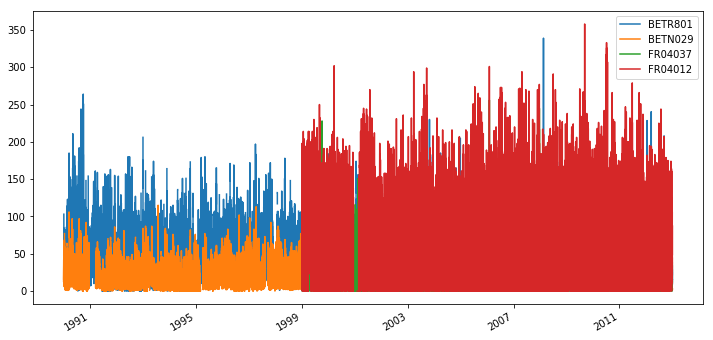

In [153]:
no2.plot(figsize=(12,6))

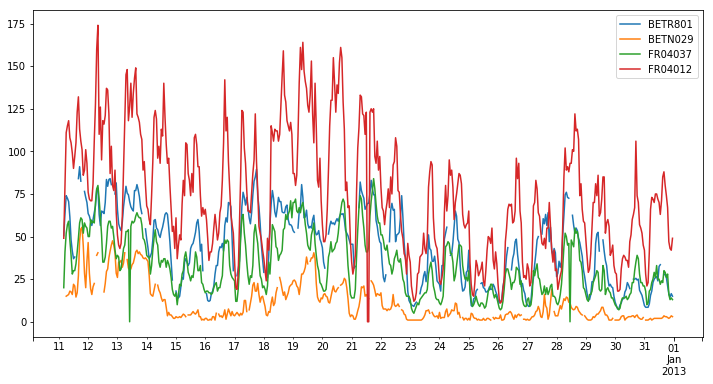

In [154]:
no2[-500:].plot(figsize=(12,6))

In [155]:
no2['month'] = no2.index.month
no2.head()

BETR801  BETN029  FR04037  FR04012  month
1990-01-01 00:00:00      NaN     16.0      NaN      NaN      1
1990-01-01 01:00:00      NaN     18.0      NaN      NaN      1
1990-01-01 02:00:00      NaN     21.0      NaN      NaN      1
1990-01-01 03:00:00      NaN     26.0      NaN      NaN      1
1990-01-01 04:00:00      NaN     21.0      NaN      NaN      1

In [156]:
no2.groupby('month').mean()

BETR801    BETN029    FR04037    FR04012
month                                            
1      50.927088  20.304075  47.634409  82.472813
2      54.168021  19.938929  50.564499  83.973207
3      54.598322  19.424205  47.862715  96.272138
4      51.491741  18.183433  40.943117  95.962862
5      45.017861  15.381570  33.172575  89.523159
6      40.593695  11.484930  30.416467  91.036197
7      37.464715  11.117964  27.552373  88.314473
8      42.263092  12.435990  28.826405  79.596765
9      49.220250  14.605979  39.706019  93.000316
10     50.894911  17.660149  44.010934  86.297836
11     50.254468  19.372193  45.564683  87.173878
12     48.644117  21.007089  45.262243  81.817977

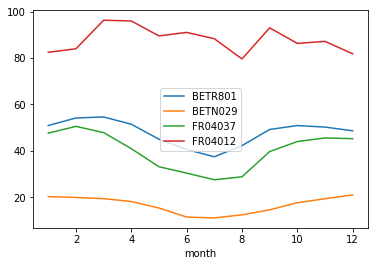

In [157]:
no2.groupby('month').mean().plot()

# Zopar dalsich uzitocnych veci pri praci s Pandas DataFrame

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

PLAYER  SALARY    GP   G    A  SOT  \
0      Sergio Agüero\n Forward — Manchester City  $19.2m  16.0  14  3.0   34   
1               Eden Hazard\n Midfield — Chelsea  $18.9m  21.0   8  4.0   17   
2             Alexis Sánchez\n Forward — Arsenal  $17.6m   NaN  12  7.0   29   
3        Yaya Touré\n Midfield — Manchester City  $16.6m  18.0   7  1.0   19   
4  Ángel Di María\n Midfield — Manchester United  $15.0m  13.0   3  NaN   13   

     PPG       P  
0  13.12  209.98  
1  13.05  274.04  
2  11.19  223.86  
3  10.99  197.91  
4  10.17  132.23

In [159]:
# premenovanie vybranych stlpcov
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df.head()

PLAYER  SALARY  games  goals  \
0      Sergio Agüero\n Forward — Manchester City  $19.2m   16.0     14   
1               Eden Hazard\n Midfield — Chelsea  $18.9m   21.0      8   
2             Alexis Sánchez\n Forward — Arsenal  $17.6m    NaN     12   
3        Yaya Touré\n Midfield — Manchester City  $16.6m   18.0      7   
4  Ángel Di María\n Midfield — Manchester United  $15.0m   13.0      3   

   assists  shots_on_target  points_per_game  points  
0      3.0               34            13.12  209.98  
1      4.0               17            13.05  274.04  
2      7.0               29            11.19  223.86  
3      1.0               19            10.99  197.91  
4      NaN               13            10.17  132.23

## transformacia hodnot v stlpci

In [160]:
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df.head()

PLAYER SALARY  games  goals  \
0      Sergio Agüero\n Forward — Manchester City   19.2   16.0     14   
1               Eden Hazard\n Midfield — Chelsea   18.9   21.0      8   
2             Alexis Sánchez\n Forward — Arsenal   17.6    NaN     12   
3        Yaya Touré\n Midfield — Manchester City   16.6   18.0      7   
4  Ángel Di María\n Midfield — Manchester United   15.0   13.0      3   

   assists  shots_on_target  points_per_game  points  
0      3.0               34            13.12  209.98  
1      4.0               17            13.05  274.04  
2      7.0               29            11.19  223.86  
3      1.0               19            10.99  197.91  
4      NaN               13            10.17  132.23

## Pridanie parzdneho stlpcu

In [161]:
df['team'] = pd.Series('', index=df.index)
df['position'] = pd.Series('', index=df.index)
df.head()

PLAYER SALARY  games  goals  \
0      Sergio Agüero\n Forward — Manchester City   19.2   16.0     14   
1               Eden Hazard\n Midfield — Chelsea   18.9   21.0      8   
2             Alexis Sánchez\n Forward — Arsenal   17.6    NaN     12   
3        Yaya Touré\n Midfield — Manchester City   16.6   18.0      7   
4  Ángel Di María\n Midfield — Manchester United   15.0   13.0      3   

   assists  shots_on_target  points_per_game  points team position  
0      3.0               34            13.12  209.98                
1      4.0               17            13.05  274.04                
2      7.0               29            11.19  223.86                
3      1.0               19            10.99  197.91                
4      NaN               13            10.17  132.23

## Transformacia ineho stlpca  a naplnenie dalsich

In [162]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)
df.head()

PLAYER SALARY  games  goals  assists  shots_on_target  \
0   Sergio Agüero   19.2   16.0     14      3.0               34   
1     Eden Hazard   18.9   21.0      8      4.0               17   
2  Alexis Sánchez   17.6    NaN     12      7.0               29   
3      Yaya Touré   16.6   18.0      7      1.0               19   
4  Ángel Di María   15.0   13.0      3      NaN               13   

   points_per_game  points               team  position  
0            13.12  209.98    Manchester City   Forward  
1            13.05  274.04            Chelsea  Midfield  
2            11.19  223.86            Arsenal   Forward  
3            10.99  197.91    Manchester City  Midfield  
4            10.17  132.23  Manchester United  Midfield

## Zistenie, kolko stlpcov ma prazdne hodnoty

In [163]:
df.shape[0] - df.dropna().shape[0]

3

## Vyber riadkov, kde su prazdne hodnoty

In [164]:
df[df['assists'].isnull()]

PLAYER SALARY  games  goals  assists  shots_on_target  \
4    Ángel Di María   15.0   13.0      3      NaN               13   
5  Santiago Cazorla   14.8   20.0      4      NaN               20   

   points_per_game  points               team  position  
4            10.17  132.23  Manchester United  Midfield  
5             9.97     NaN            Arsenal  Midfield

## Vyber plnych riadkov

In [165]:
df[df['assists'].notnull()]
# df[~df['assists'].isnull()]

PLAYER SALARY  games  goals  assists  shots_on_target  \
0   Sergio Agüero   19.2   16.0     14      3.0               34   
1     Eden Hazard   18.9   21.0      8      4.0               17   
2  Alexis Sánchez   17.6    NaN     12      7.0               29   
3      Yaya Touré   16.6   18.0      7      1.0               19   
6     David Silva   14.3   15.0      6      2.0               11   
7   Cesc Fàbregas   14.0   20.0      2     14.0               10   
8  Saido Berahino   13.8   21.0      9      0.0               20   
9  Steven Gerrard   13.8   20.0      5      1.0               11   

   points_per_game  points             team  position  
0            13.12  209.98  Manchester City   Forward  
1            13.05  274.04          Chelsea  Midfield  
2            11.19  223.86          Arsenal   Forward  
3            10.99  197.91  Manchester City  Midfield  
6            10.35  155.26  Manchester City  Midfield  
7            10.47  209.49          Chelsea  Midfield  
8             7.02  147.43        West Brom   Forward  
9             7.50  150.01        Liverpool  Midfield

## Spajanie podmienok

In [166]:
df[ (df['team'] == 'Arsenal') | (df['team'] == 'Chelsea') ]

PLAYER SALARY  games  goals  assists  shots_on_target  \
1       Eden Hazard   18.9   21.0      8      4.0               17   
2    Alexis Sánchez   17.6    NaN     12      7.0               29   
5  Santiago Cazorla   14.8   20.0      4      NaN               20   
7     Cesc Fàbregas   14.0   20.0      2     14.0               10   

   points_per_game  points     team  position  
1            13.05  274.04  Chelsea  Midfield  
2            11.19  223.86  Arsenal   Forward  
5             9.97     NaN  Arsenal  Midfield  
7            10.47  209.49  Chelsea  Midfield

In [167]:
df[ (df['team'] == 'Arsenal') & (df['position'] == 'Forward') ]

PLAYER SALARY  games  goals  assists  shots_on_target  \
2  Alexis Sánchez   17.6    NaN     12      7.0               29   

   points_per_game  points     team position  
2            11.19  223.86  Arsenal  Forward

# Nejake zdroje na studium
* http://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb
* http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb
* [Pandas Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf), [nejaky komentar k tomu](http://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html)

# Nejake dalsie nastroje
* [OpenRefine](http://openrefine.org/) - standalone nastroj na cistenie a pozeranie sa do dat
* [Trifacta](https://www.trifacta.com/products/wrangler/)

## SQL v Pandas

In [ ]:
from pandasql import sqldf

In [ ]:
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

In [ ]:
type(meat)

In [ ]:
meat.head()

In [ ]:
births.head()

In [ ]:
data = {'meat': meat}

In [ ]:
sqldf('select * from meat limit 10', data)

In [ ]:
data2 = {'meat2': meat}

In [ ]:
sqldf('select * from meat2 limit 10', data2)

In [ ]:
sqldf('select * from meat limit 10', locals())

In [ ]:
sqldf('select * from births limit 10', locals())

In [ ]:
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = sqldf(q, locals())
print(joined.head())

Pandasql bezi na SQLite3, takze vsetky klasicke opercaie v SQL viete robit aj tu. Funguju podmienky, vnorene dopyty, joiny, union, funkcie, ...

# Dalsie velmi pekne navody na pracu s datami pomocou Pandas

toto su notebooky jedneho celeho stretnutia, kde robili celkom dlhy tutorial
https://github.com/ResearchComputing/Meetup-Fall-2013

Vybrane konkretne casti, ktore su pre nas specialne zaujimave:

* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb
* https://github.com/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb

# Kde si dalej precvicit pouzivanie Pandas a Numpy


### Numpy
* 100 uloh aj so vzorovymi rieseniami - https://github.com/rougier/numpy-100
* Dalsie ulohy aj s rieseniami - https://www.w3resource.com/python-exercises/numpy/index.php
* Cheat Sheet - https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

### Pandas
* 100 uloh aj so vzorovymi rieseniami - https://github.com/ajcr/100-pandas-puzzles
* Dalsie ulohy aj s rieseniami - https://www.w3resource.com/python-exercises/pandas/index.php
* Tutorial priamo z dokumentacie ku kniznici - https://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Ulohy na roznych skutocnych datasetoch - https://github.com/guipsamora/pandas_exercises
* Pandas Cheat Sheet - https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
* Data Wrangling in Python Cheat Sheet - https://www.datacamp.com/community/blog/pandas-cheat-sheet-python
